In [324]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

from bioinfokit.analys import stat

In [2]:
#import data
diabetes = pd.read_csv('Data/diabetes.csv')
diabetes.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [3]:
#check missing value
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes.shape

(768, 9)

In [5]:
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
#get statistical summary of the dataset
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

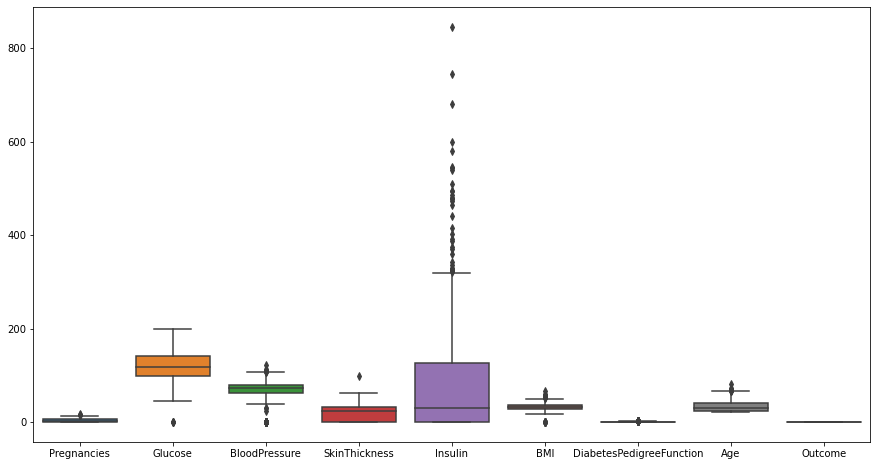

In [31]:
#box plot for the original data for visualization
fig , ax = plt.subplots(figsize = (15,8))
sns.boxplot(data = diabetes, ax = ax)

plt.show()

In [8]:
#number of missing data in the 5 variables
print('0 in Glucose:', diabetes['Glucose'].value_counts()[0])
print('0 in BloodPressure:', diabetes['BloodPressure'].value_counts()[0])
print('0 in SkinThickness:', diabetes['SkinThickness'].value_counts()[0])
print('0 in Insulin:', diabetes['Insulin'].value_counts()[0])
print('0 in BMI:', diabetes['BMI'].value_counts()[0])

0 in Glucose: 5
0 in BloodPressure: 35
0 in SkinThickness: 227
0 in Insulin: 374
0 in BMI: 11


In [9]:
#make a copy of the original dataset for data cleaning
df1 = diabetes.copy()

In [10]:
#attempt 1: replace missing value by median of each attribute 
df1['Glucose'] = df1['Glucose'].replace(0, df1[df1.Glucose != 0].Glucose.median())
df1['BloodPressure'] = df1['BloodPressure'].replace(0, df1[df1.BloodPressure != 0].BloodPressure.median())
df1['SkinThickness'] = df1['SkinThickness'].replace(0, df1[df1.SkinThickness != 0].SkinThickness.median())
df1['Insulin'] = df1['Insulin'].replace(0, df1[df1.Insulin != 0].Insulin.median())
df1['BMI'] = df1['BMI'].replace(0, df1[df1.BMI != 0].BMI.median())

In [11]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

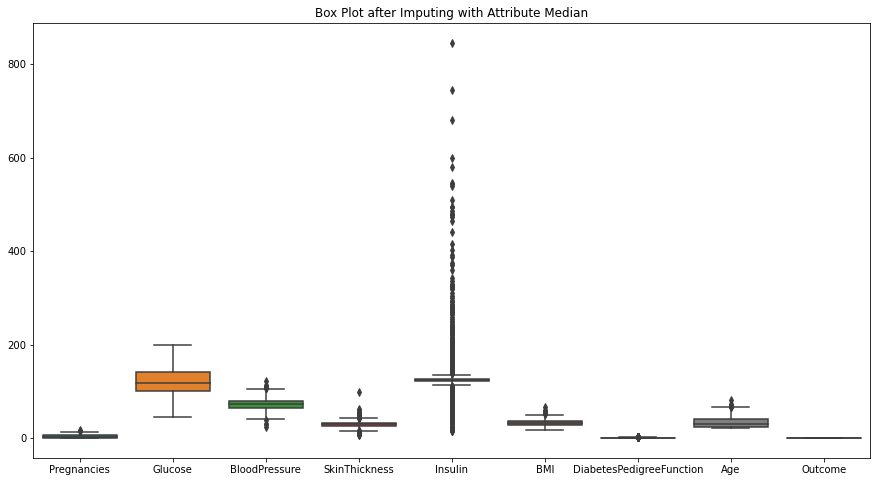

In [196]:
#box plot after replacing 0 with median of each attribute
fig , ax = plt.subplots(figsize = (15,8))
sns.boxplot(data = df1, ax = ax)
plt.title('Box Plot after Imputing with Attribute Median')
plt.show()

#data distribution of Skinthickness & Insulin gets even worse, because of too many missing data

In [13]:
#make another copy of original dataset for data cleaning attempt 2
df2 = diabetes.copy()

#mark all the missing data in the 5 columns as nan
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df2[cols] = df2[cols].replace({'0':np.nan, 0:np.nan})

In [14]:
df2.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [16]:
#attempt 2: replace missing value with the calculated median 
#of each attributed restricted to the outcome variable (diabetes in this case)

df2= df2[['Outcome']].join(df2.groupby('Outcome')
                               .transform(lambda x: x.fillna(x.median())).astype(float))
df2.head(20)

Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0         1          6.0    148.0           72.0           35.0    169.5   
1         0          1.0     85.0           66.0           29.0    102.5   
2         1          8.0    183.0           64.0           32.0    169.5   
3         0          1.0     89.0           66.0           23.0     94.0   
4         1          0.0    137.0           40.0           35.0    168.0   
5         0          5.0    116.0           74.0           27.0    102.5   
6         1          3.0     78.0           50.0           32.0     88.0   
7         0         10.0    115.0           70.0           27.0    102.5   
8         1          2.0    197.0           70.0           45.0    543.0   
9         1          8.0    125.0           96.0           32.0    169.5   
10        0          4.0    110.0           92.0           27.0    102.5   
11        1         10.0    168.0           74.0           32.0    169.5   
12        0         10.0    139.0           80.0           27.0    102.5   
13        1          1.0    189.0           60.0           23.0    846.0   
14        1          5.0    166.0           72.0           19.0    175.0   
15        1          7.0    100.0           74.5           32.0    169.5   
16        1          0.0    118.0           84.0           47.0    230.0   
17        1          7.0    107.0           74.0           32.0    169.5   
18        0          1.0    103.0           30.0           38.0     83.0   
19        1          1.0    115.0           70.0           30.0     96.0   

     BMI  DiabetesPedigreeFunction   Age  
0   33.6                     0.627  50.0  
1   26.6                     0.351  31.0  
2   23.3                     0.672  32.0  
3   28.1                     0.167  21.0  
4   43.1                     2.288  33.0  
5   25.6                     0.201  30.0  
6   31.0                     0.248  26.0  
7   35.3                     0.134  29.0  
8   30.5                     0.158  53.0  
9   34.3                     0.232  54.0  
10  37.6                     0.191  30.0  
11  38.0                     0.537  34.0  
12  27.1                     1.441  57.0  
13  30.1                     0.398  59.0  
14  25.8                     0.587  51.0  
15  30.0                     0.484  32.0  
16  45.8                     0.551  31.0  
17  29.6                     0.254  31.0  
18  43.3                     0.183  33.0  
19  34.6                     0.529  32.0

In [17]:
#check missing data again
df2.isna().sum()

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [18]:
df2.dtypes

Outcome                       int64
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [19]:
#change data type & round DiabetesPedigreeFunction attribute
df2 = df2.astype({ 'Outcome': int, 'Pregnancies': int, 'Glucose': int, 'BloodPressure': int, 
                  'SkinThickness': int, 'Age': int})

print(df2.dtypes)

Outcome                       int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


In [20]:
df2= df2.round({'DiabetesPedigreeFunction': 3})
df2.head()

Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35    169.5  33.6   
1        0            1       85             66             29    102.5  26.6   
2        1            8      183             64             32    169.5  23.3   
3        0            1       89             66             23     94.0  28.1   
4        1            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [21]:
#stastical summary for the cleaned dataset
df2.describe()

Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean     0.348958     3.845052  121.677083      72.378906      29.089844   
std      0.476951     3.369578   30.464161      12.104431       8.890820   
min      0.000000     0.000000   44.000000      24.000000       7.000000   
25%      0.000000     1.000000   99.750000      64.000000      25.000000   
50%      0.000000     3.000000  117.000000      72.000000      28.000000   
75%      1.000000     6.000000  140.250000      80.000000      32.000000   
max      1.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean   141.753906   32.434635                  0.471876   33.240885  
std     89.100847    6.880498                  0.331329   11.760232  
min     14.000000   18.200000                  0.078000   21.000000  
25%    102.500000   27.500000                  0.243750   24.000000  
50%    102.500000   32.050000                  0.372500   29.000000  
75%    169.500000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

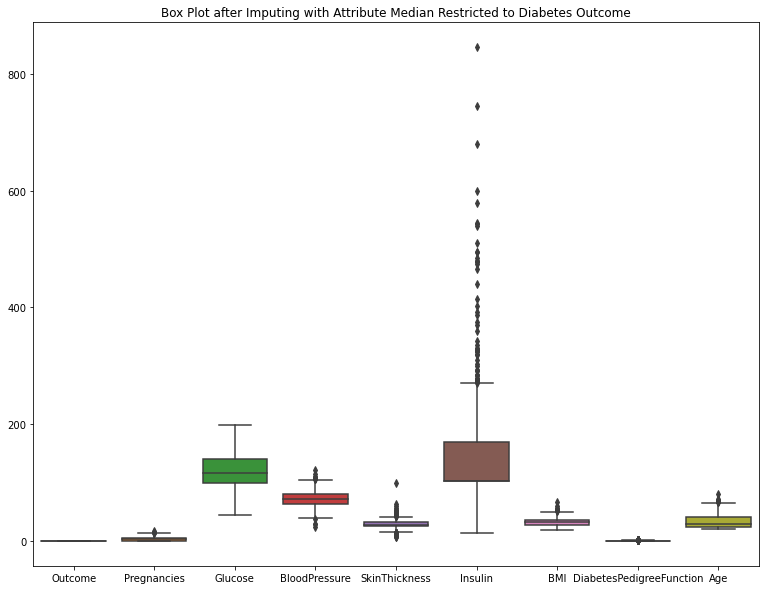

In [199]:
### EDA ###
#boxplot for the cleaned dataset
fig , ax = plt.subplots(figsize = (13,10))
sns.boxplot(data = df2, ax = ax)
plt.title('Box Plot after Imputing with Attribute Median Restricted to Diabetes Outcome')
plt.show()

In [452]:
BP_df = df2[['BloodPressure', 'BMI', 'Outcome']].copy()
BP_bins = [0,79, 89, 125]
#BP_bins = [0,79, 125]
BP_label = ['Normal', 'Pre-HPT', 'HPT']
#BP_label = [0,1, 2]
BP_class = pd.cut(BP_df['BloodPressure'], BP_bins, labels = BP_label)
BP_df.insert(1, 'Hypertension', BP_class)

BMI_bins = [0,18.5,24.9,29.9, 70 ]
BMI_label = ['Underweight', 'Healthy', 'Overweight', 'Obesity']
#Obese_label = ['1', '2', '3', '4']
#Weight_label = [1,2,3,4]
BMI_class = pd.cut(BP_df['BMI'], bins= BMI_bins, labels = BMI_label, right = False)
BP_df.insert(2, 'BMI_Group', BMI_class)
 

BP_df.head()

BloodPressure Hypertension   BMI_Group   BMI  Outcome
0             72       Normal     Obesity  33.6        1
1             66       Normal  Overweight  26.6        0
2             64       Normal     Healthy  23.3        1
3             66       Normal  Overweight  28.1        0
4             40       Normal     Obesity  43.1        1

In [453]:
BP_df['Hypertension'].value_counts()

Normal     563
Pre-HPT    145
HPT         60
Name: Hypertension, dtype: int64

In [454]:
BP_df['BMI_Group'].value_counts()

Obesity        488
Overweight     175
Healthy        101
Underweight      4
Name: BMI_Group, dtype: int64

In [455]:
BP_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

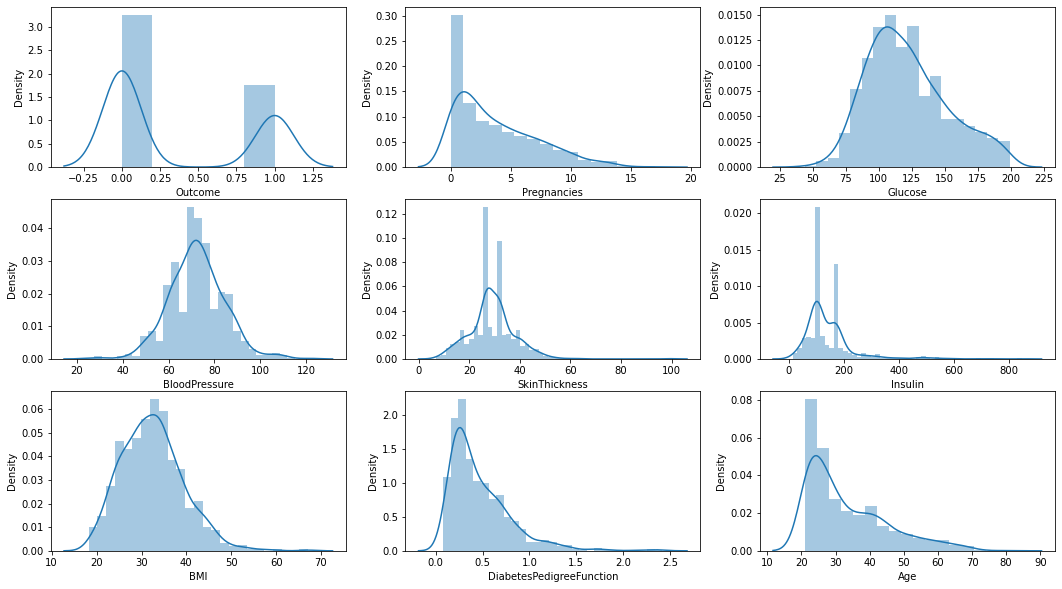

In [203]:
#create grouped density plots to visualize the distribution of all attributes
# Define the number of rows and columns 
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (18,10))

for i, column in enumerate(df2.columns):
    sns.distplot(df2[column],ax=axes[i//n_cols,i%n_cols])

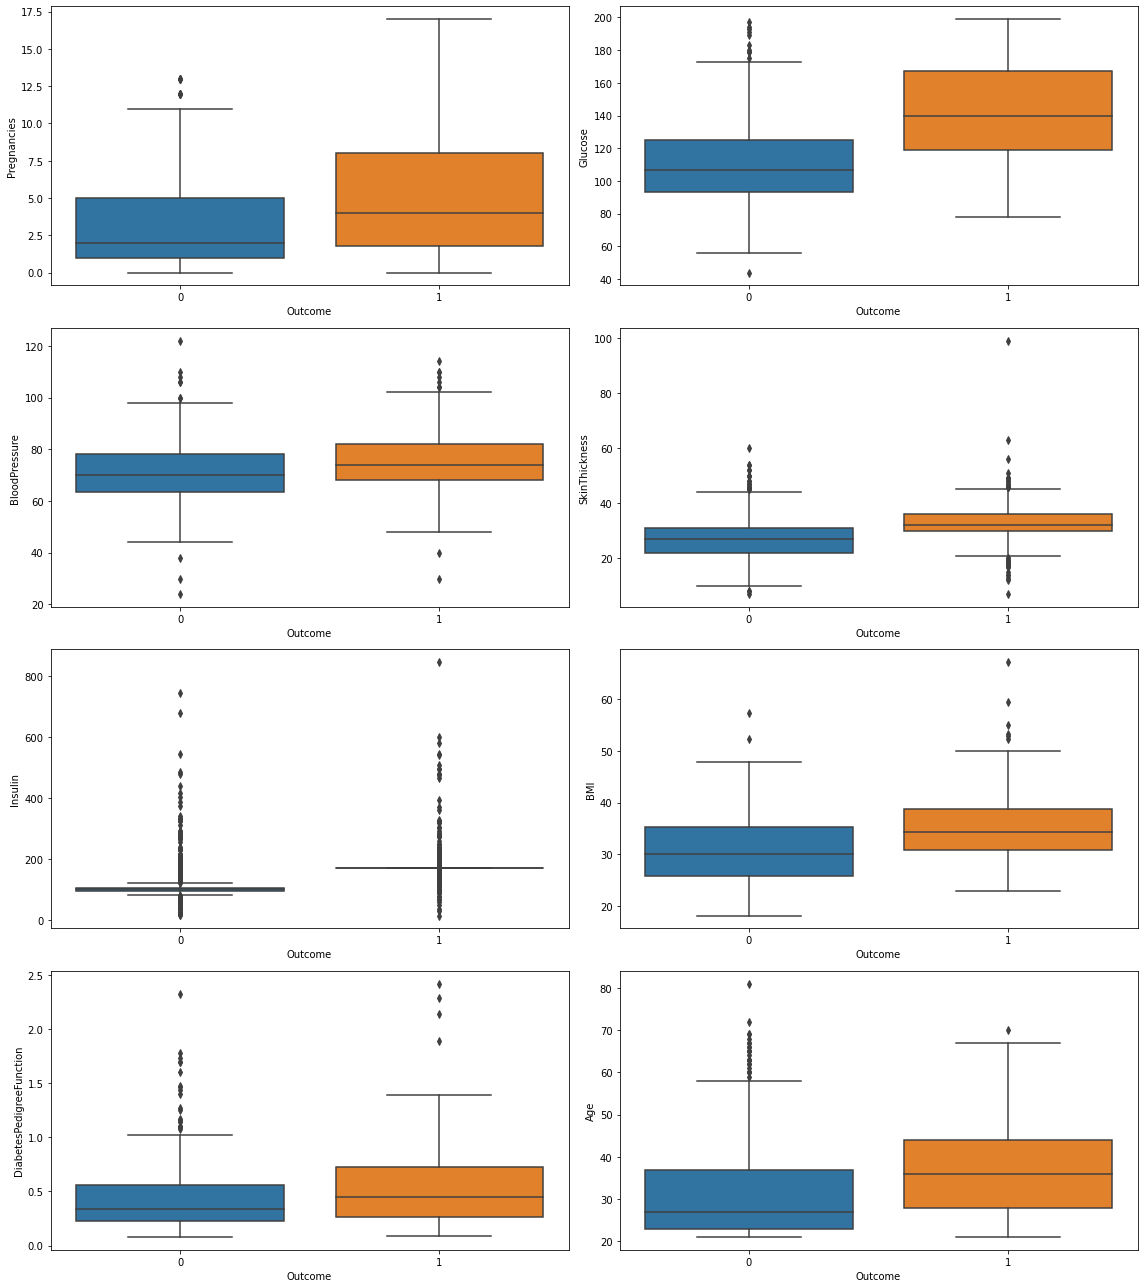

In [24]:
#create boxplot for each attribute in relation to 'Outcome'
column_list = list(df2.columns)
fig, ax = plt.subplots(4, 2, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list[1:]):
  sns.boxplot(data=df2, x='Outcome', y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

In [25]:
#see correlation between Diabetes and the rest attribute
corr = df2.corr()
#df2.corr(method= 'pearson').sort_values(by= Outcome, ascending=False)
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.377081
BMI                         0.315577
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.173316
Name: Outcome, dtype: float64

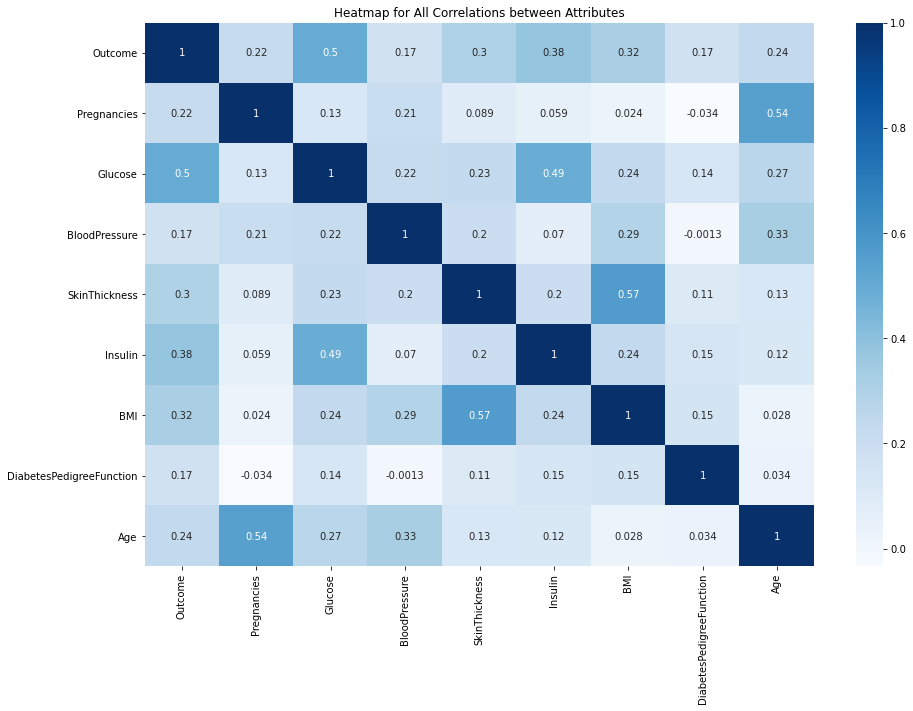

In [204]:
#heatmap for correlation between Diabetes and the rest attribute
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues').set(title = 'Heatmap for All Correlations between Attributes')
plt.show()

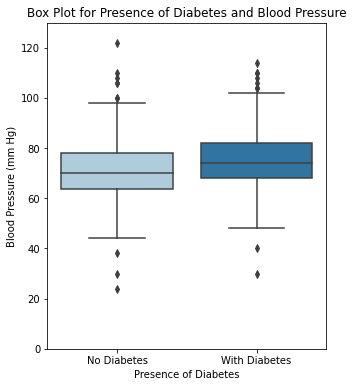

In [282]:
### stats analysis ###

#visulization for blood pressure & diabetes
#flg, axs = plt.subplots(ncols=2, figsize=(10,5))
flg, axs = plt.subplots(figsize=(5,6))
#sns.scatterplot(data=df2, x='Outcome', y='BloodPressure',ax=axs[0], palette = 'Paired')
sns.boxplot(data=df2, x='Outcome', y='BloodPressure',ax=axs,palette = 'Paired' ).set(title= 'Box Plot for Presence of Diabetes and Blood Pressure')
plt.ylabel('Blood Pressure (mm Hg)')
plt.xlabel('Presence of Diabetes')
plt.xticks([0, 1], ['No Diabetes', 'With Diabetes'])
plt.ylim(0, 130)
#sns.boxplot(data=df2, x='genotype', y='height', hue=df.genotype.tolist(),ax=axs[2])
plt.show()

In [35]:
#independent t-test for BloodPressure and Diabetes
t, p = stats.ttest_ind(df2['BloodPressure'][df2['Outcome'] == 0],
                       df2['BloodPressure'][df2['Outcome'] == 1])
                       #equal_var = False)
#print('t-test for gender', t, p)
print('t-test for blood pressure by the presence of diabetes, t-value  = {:5.4f} and p-value = {:5.4f}'.format(t, p))

 

t-test for blood pressure by the presence of diabetes, t-value  = -4.8705 and p-value = 0.0000


In [39]:
#instore researchpy
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [40]:
#do t-test using researchpy
import researchpy as rp
rp.ttest(group1= df2['BloodPressure'][df2['Outcome'] == 0], group1_name= "No_Diabetes",
         group2= df2['BloodPressure'][df2['Outcome'] == 1], group2_name= "Diabetes")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  No_Diabetes  500.0  70.844000  11.928631  0.533465  69.795886  71.892114
 1     Diabetes  268.0  75.242537  11.929762  0.728726  73.807757  76.677318
 2     combined  768.0  72.378906  12.104431  0.436781  71.521478  73.236334,
                        Independent t-test   results
 0  Difference (No_Diabetes - Diabetes) =    -4.3985
 1                   Degrees of freedom =   766.0000
 2                                    t =    -4.8705
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     0.0000
 5               Difference > 0 p value =     1.0000
 6                            Cohen's d =    -0.3687
 7                            Hedge's g =    -0.3684
 8                        Glass's delta =    -0.3687
 9                          Pearson's r =     0.1733)

In [44]:
#assumption check
#Normality of Bloodpressure using Shapiro-Wilk

stats.shapiro(df2['BloodPressure'])
#w, pvalue = stats.shapiro(BMI_shapiro)
#print(w, pvalue)

ShapiroResult(statistic=0.9880667328834534, pvalue=6.635423687839648e-06)

In [45]:
#Normality test for BMI by two outcome groups using D'Agostino-Pearson K^2 Test
stats.ks_2samp(df2['BloodPressure'][df2['Outcome'] == 0],
                       df2['BloodPressure'][df2['Outcome'] == 1])

#reject H0 -> violate normality assumption

KstestResult(statistic=0.18498507462686567, pvalue=1.0555640790776977e-05)

In [48]:
#Homogeneity of variances test using Bartlett's test
stats.bartlett(df2['BloodPressure'][df2['Outcome'] == 0],
                       df2['BloodPressure'][df2['Outcome'] == 1])

#p > 0.05, fial to reject -> do have consistent variance

BartlettResult(statistic=3.122382277340971e-06, pvalue=0.9985901176553388)

In [323]:
# Variance test using levene's test
from scipy.stats import levene

# subsetting the data:
group1 = df2['BloodPressure'][df2['Outcome'] == 0]
group2 = df2['BloodPressure'][df2['Outcome'] == 1]

# Levene test in Python with SciPy:
Levene_stat, p = levene(group1, group2)

# Get the results:
print(Levene_stat, p)

0.20101387080622155 0.6540305085259368


In [223]:
### One-way ANOVA ###

#make a copy of df2 
#group BMI
df3 = df2.copy()

#bins = [0,79, 89, 125]
#BP_label = ['Normal', 'Pre-HPT', 'HPT']
#BP_class = pd.cut(df3['BloodPressure'], bins, labels = BP_label)
#df3.insert(4, 'BPGroup', BP_class)

bins = [0,18.5,24.9,29.9, 70 ]
#Obese_label = ['Underweight', 'Healthy', 'Overweight', 'Obesity']
#Obese_label = ['1', '2', '3', '4']
Weight_label = [1,2,3,4]
Weight_class = pd.cut(df3['BMI'], bins= bins, labels = Weight_label, right = False)
df3.insert(7, 'WeightCategory', Weight_class)
df3.head()

Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35    169.5  33.6   
1        0            1       85             66             29    102.5  26.6   
2        1            8      183             64             32    169.5  23.3   
3        0            1       89             66             23     94.0  28.1   
4        1            0      137             40             35    168.0  43.1   

  WeightCategory  DiabetesPedigreeFunction  Age  
0              4                     0.627   50  
1              3                     0.351   31  
2              2                     0.672   32  
3              3                     0.167   21  
4              4                     2.288   33

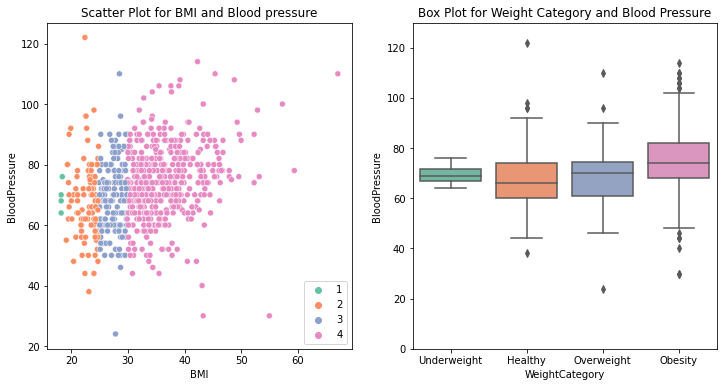

In [281]:
#Scatter plot and box plot for weight category and blood pressure
flg, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=df3, x='BMI', y='BloodPressure', hue= df3['WeightCategory'].tolist(), 
                ax=axs[0], palette = 'Set2').set(title = 'Scatter Plot for BMI and Blood pressure')
sns.boxplot(data=df3, x='WeightCategory', y='BloodPressure', palette= 'Set2').set(title='Box Plot for Weight Category and Blood Pressure')
  
plt.xticks([0, 1, 2, 3], ['Underweight', 'Healthy', 'Overweight', 'Obesity'])
plt.ylim(0, 130)
#sns.boxplot(data=df2, x='genotype', y='height', hue=df.genotype.tolist(),ax=axs[2])
plt.show()




In [83]:
#one-way anova for Weight category and Blood pressure
mod = ols('BloodPressure ~ WeightCategory', data= df3).fit()
aov_table= sm.stats.anova_lm(mod, typ= 2)
print(aov_table)

#p< 0.05 --> significant main test result

                       sum_sq     df          F        PR(>F)
WeightCategory    5572.369472    3.0  13.286631  1.840104e-08
Residual        106806.368809  764.0        NaN           NaN


In [84]:
#post hoc tests for one-way anova: tukey hsd -- pair-wise t test 
 
pair_t = mod.t_test_pairwise('WeightCategory')
pair_t.result_frame

coef   std err         t         P>|t|  Conf. Int. Low  \
2-1 -1.539604  6.027759 -0.255419  7.984683e-01      -13.372540   
3-1 -0.128571  5.979012 -0.021504  9.828494e-01      -11.865813   
4-1  4.895492  5.936009  0.824711  4.097931e-01       -6.757332   
3-2  1.411033  1.477497  0.955015  3.398721e-01       -1.489404   
4-2  6.435096  1.292525  4.978701  7.917034e-07        3.897774   
4-3  5.024063  1.041789  4.822535  1.711021e-06        2.978955   

     Conf. Int. Upp.  pvalue-hs  reject-hs  
2-1        10.293332   0.959385      False  
3-1        11.608670   0.982849      False  
4-1        16.548316   0.810105      False  
3-2         4.311469   0.810105      False  
4-2         8.972418   0.000005       True  
4-3         7.069172   0.000009       True

In [111]:
#one-way anova assumption check
#test normality for one-way anova
res_oneway = stat()
res_oneway.tukey_hsd(df=df3, res_var = 'BloodPressure', xfac_var= 'WeightCategory', 
                   anova_model = 'BloodPressure ~ WeightCategory')

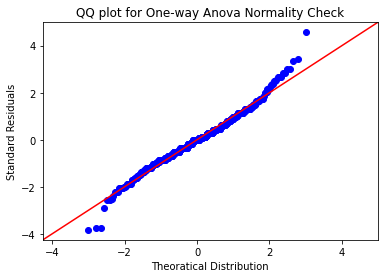

In [112]:
sm.qqplot(res_oneway.anova_std_residuals, line = '45')
plt.xlabel('Theoratical Distribution')
plt.ylabel('Standard Residuals')
plt.title('QQ plot for One-way Anova Normality Check')
plt.show()

#normal distribution

In [90]:
#constancy of variance across groups -> levene's test (popular one, also have other tests)
res = stat()
res.levene(df= df3, res_var = 'BloodPressure', xfac_var= 'WeightCategory')
res.levene_summary

#fail to reject H0 --> consistent variance

Parameter   Value
0      Test statistics (W)  0.9455
1  Degrees of freedom (Df)  3.0000
2                  p value  0.4181

In [233]:
#Homogeneity of variances test using Bartlett's test
stat.bartlett(df3['BloodPressure'], df3['WeightCategory'])

#p > 0.05, fial to reject -> do have consistent variance

AttributeError: 'numpy.float64' object has no attribute 'bartlett'

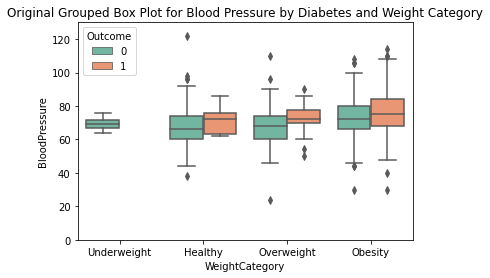

In [275]:
### Two-way ANOVA ###
#2-way anova visualization 

sns.boxplot(x='WeightCategory', y='BloodPressure', hue= 'Outcome', data=df3, palette= 'Set2')
           #order= ["1", "2", "3", "4"])


plt.xticks([0, 1, 2, 3], ['Underweight', 'Healthy', 'Overweight', 'Obesity'])
plt.title('Original Grouped Box Plot for Blood Pressure by Diabetes and Weight Category')
plt.ylim(0, 130)

plt.show()

In [93]:
#two-way anova
model2 = ols('BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)', data= df3).fit()
Two_way_anova_table = sm.stats.anova_lm(model2, typ=2)
Two_way_anova_table

sum_sq     df             F        PR(>F)
C(Outcome)                    1.071871e-11    1.0  7.737810e-14  9.999998e-01
C(WeightCategory)             5.572369e+03    3.0  1.340894e+01  1.555031e-08
C(Outcome):C(WeightCategory)  1.389768e+03    3.0  3.344234e+00  1.879117e-02
Residual                      1.054166e+05  761.0           NaN           NaN

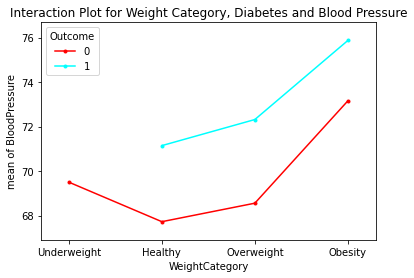

In [103]:
from statsmodels.graphics.factorplots import interaction_plot
from bioinfokit.analys import stat

#interaction plot for 2-way anova  
#convert a box plot into a line plot
 
plt.figsize= (8,10)
df3 = df3.astype({ 'Outcome': str, 'WeightCategory': str})
fig = interaction_plot(x=df3['WeightCategory'], trace=df3['Outcome'], response= df3['BloodPressure'])
                     #, color = )
plt.xticks([0, 1, 2, 3], ['Underweight', 'Healthy', 'Overweight', 'Obesity'])
plt.title('Interaction Plot for Weight Category, Diabetes and Blood Pressure')
plt.show()

In [115]:
#tukey test for 2-way ANOVA
#for main effect WeightCategory
res = stat()
res.tukey_hsd(df=df3, res_var='BloodPressure', xfac_var = 'WeightCategory',
              anova_model= 'BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)')
res.tukey_summary

group1 group2      Diff      Lower      Upper   q-value   p-value
0      4      3  5.024063   2.353977   7.694149  6.851412  0.001000
1      4      2  6.435096   3.122378   9.747814  7.073279  0.001000
2      4      1  4.895492 -10.318391  20.109374  1.171673  0.820227
3      3      2  1.411033  -2.375766   5.197831  1.356797  0.746799
4      3      1  0.128571 -15.195526  15.452669  0.030551  0.900000
5      2      1  1.539604 -13.909432  16.988640  0.362876  0.900000

In [116]:
#for main effect Diabetes
res2 = stat()
res2.tukey_hsd(df=df3, res_var='BloodPressure', xfac_var = 'Outcome',
              anova_model= 'BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)')
res2.tukey_summary

#only 2 groups in Diabetes 1/0

group1 group2      Diff     Lower     Upper   q-value  p-value
0      1      0  4.398537  2.649376  6.147698  6.981245    0.001

In [105]:
#tukey test for 2-way ANOVA
res3 = stat()
res3.tukey_hsd(df=df3, res_var='BloodPressure', xfac_var = ['WeightCategory', 'Outcome'],
              anova_model= 'BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)')
res3.tukey_summary

/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:862: RuntimeWarning: divide by zero encountered in true_divide
  mse_factor = np.sqrt(np.divide(mse, group1_count) + np.divide(mse, group2_count))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:870: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:873: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:869: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:872: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +



NaN result encountered.

NaN result encountered.

NaN result encountered.


group1  group2      Diff      Lower      Upper   q-value   p-value
0   (4, 1)  (4, 0)  2.715238  -0.535455   5.965932  3.590263  0.180619
1   (4, 1)  (3, 1)  3.554166  -2.723779   9.832111  2.433405  0.650801
2   (4, 1)  (3, 0)  7.315211   3.432098  11.198324  8.097317  0.001000
3   (4, 1)  (2, 1)  4.727098  -9.003958  18.458154  1.479738  0.900000
4   (4, 1)  (2, 0)  8.146551   3.747543  12.545559  7.960005  0.001000
5   (4, 1)  (1, 1)  0.000000       -inf        inf  0.000000  0.900000
6   (4, 1)  (1, 0)  6.369955 -11.675672  24.415582  1.517255  0.900000
7   (4, 0)  (3, 1)  0.838928  -5.366162   7.044017  0.581126  0.900000
8   (4, 0)  (3, 0)  4.599972   0.835785   8.364160  5.252647  0.005352
9   (4, 0)  (2, 1)  2.011860 -11.686040  15.709759  0.631303  0.900000
10  (4, 0)  (2, 0)  5.431313   1.136919   9.725706  5.436223  0.003281
11  (4, 0)  (1, 1)  0.000000       -inf        inf  0.000000  0.900000
12  (4, 0)  (1, 0)  3.654717 -14.365694  21.675128  0.871733  0.900000
13  (3, 1)  (3, 0)  3.761045  -2.797514  10.319604  2.464872  0.637542
14  (3, 1)  (2, 1)  1.172932 -13.540260  15.886125  0.342658  0.900000
15  (3, 1)  (2, 0)  4.592385  -2.284198  11.468969  2.870515  0.464407
16  (3, 1)  (1, 1)  0.000000       -inf        inf  0.000000  0.900000
17  (3, 1)  (1, 0)  2.815789 -15.987955  21.619534  0.643651  0.900000
18  (3, 0)  (2, 1)  2.588113 -11.273489  16.449715  0.802535  0.900000
19  (3, 0)  (2, 0)  0.831340  -3.959628   5.622308  0.745847  0.900000
20  (3, 0)  (1, 1)  0.000000       -inf        inf  0.000000  0.900000
21  (3, 0)  (1, 0)  0.945255 -17.199903  19.090414  0.223915  0.900000
22  (2, 1)  (2, 0)  3.419453 -10.595422  17.434328  1.048725  0.900000
23  (2, 1)  (1, 1)  0.000000       -inf        inf  0.000000  0.900000
24  (2, 1)  (1, 0)  1.642857 -20.778341  24.064055  0.314945  0.900000
25  (2, 0)  (1, 1)  0.000000       -inf        inf  0.000000  0.900000
26  (2, 0)  (1, 0)  1.776596 -16.485920  20.039111  0.418141  0.900000
27  (1, 1)  (1, 0)       NaN        NaN        NaN       NaN  0.556613

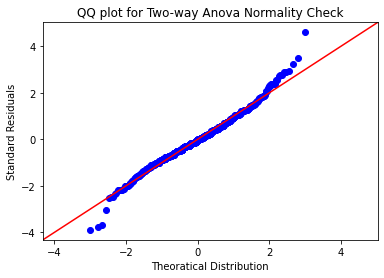

In [113]:
#Normality test for 2-way ANOVA
sm.qqplot(res3.anova_std_residuals, line = '45')
plt.xlabel('Theoratical Distribution')
plt.ylabel('Standard Residuals')
plt.title('QQ plot for Two-way Anova Normality Check')
plt.show()


In [118]:
#constancy of variance for 2-way ANOVA -> levene's test (popular one, also have other tests)
res= stat()
res.levene(df= df3, res_var = 'BloodPressure', xfac_var= ['WeightCategory', 'Outcome'])
res.levene_summary

#there is significant difference in teh variance across groups 

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Parameter  Value
0      Test statistics (W)    NaN
1  Degrees of freedom (Df)    7.0
2                  p value    NaN

In [311]:
#since no subject is both underweight & living with diabetes
#
#decide to combine underweight & healthy groups in Weight Category for calculation purpose only

#copy a new dataframe for 2-way anova
df4= df2.copy()

bins = [0,24.9,29.9, 70 ]
#Obese_label = ['Underweight', 'Healthy', 'Overweight', 'Obesity']
#Obese_label = ['1', '2', '3', '4']
Weight_label = [1,2,3]
Weight_class = pd.cut(df4['BMI'], bins= bins, labels = Weight_label, right = False)
df4.insert(7, 'WeightCategory', Weight_class)
df4.head()

Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35    169.5  33.6   
1        0            1       85             66             29    102.5  26.6   
2        1            8      183             64             32    169.5  23.3   
3        0            1       89             66             23     94.0  28.1   
4        1            0      137             40             35    168.0  43.1   

  WeightCategory  DiabetesPedigreeFunction  Age  
0              3                     0.627   50  
1              2                     0.351   31  
2              1                     0.672   32  
3              2                     0.167   21  
4              3                     2.288   33

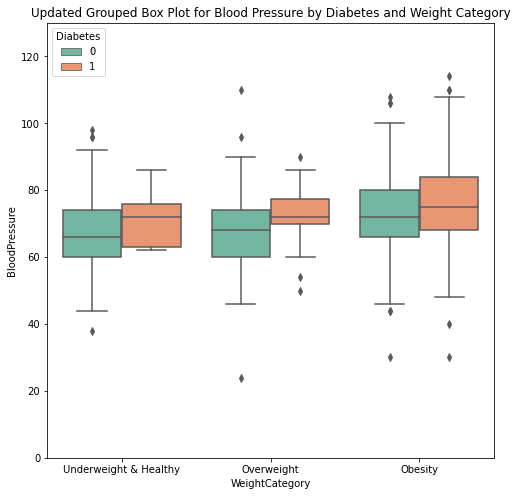

In [312]:
#2-way anova visualization 
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x='WeightCategory', y='BloodPressure', hue= 'Outcome', data=df4, palette= 'Set2')
           #order= ["1", "2", "3", "4"])
 
plt.xticks([0, 1, 2], ['Underweight & Healthy', 'Overweight', 'Obesity'])
plt.legend(title= 'Diabetes', loc=2)
plt.title('Updated Grouped Box Plot for Blood Pressure by Diabetes and Weight Category')
plt.ylim(0,130)
plt.show()

In [313]:
#two-way anova
model = ols('BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)', data= df4).fit()
Two_way_anova_table = sm.stats.anova_lm(model, typ=2)
Two_way_anova_table

sum_sq     df          F    PR(>F)
C(Outcome)                      1359.525093    1.0   9.826148  0.001786
C(WeightCategory)               3547.103038    2.0  12.818579  0.000003
C(Outcome):C(WeightCategory)      27.253281    2.0   0.098488  0.906218
Residual                      105428.710756  762.0        NaN       NaN

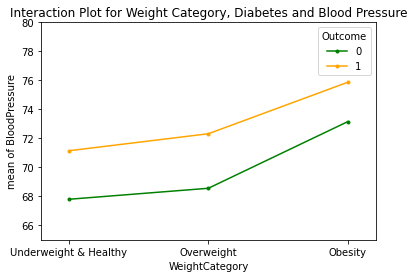

In [314]:
plt.figsize= (8,10)
df4 = df4.astype({ 'Outcome': str, 'WeightCategory': str})
fig = interaction_plot(x=df4['WeightCategory'], trace=df4['Outcome'], response= df4['BloodPressure']
                     , colors = ['Green', 'Orange'])
plt.xticks([0, 1, 2], ['Underweight & Healthy', 'Overweight', 'Obesity'])
plt.title('Interaction Plot for Weight Category, Diabetes and Blood Pressure')
plt.ylim(65,80)
plt.show()

In [325]:
#tukey test for 2-way ANOVA
#for main effect WeightCategory
res = stat()
res.tukey_hsd(df=df4, res_var='BloodPressure', xfac_var = 'WeightCategory',
              anova_model= 'BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)')
res.tukey_summary


group1 group2      Diff     Lower     Upper   q-value  p-value
0      3      2  5.024063  2.590214  7.457912  6.855518  0.00100
1      3      1  6.376444  3.404856  9.348032  7.126377  0.00100
2      2      1  1.352381 -2.057436  4.762198  1.317185  0.61098

In [326]:
#for main effect Diabetes
res2 = stat()
res2.tukey_hsd(df=df4, res_var='BloodPressure', xfac_var = 'Outcome',
              anova_model= 'BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)')
res2.tukey_summary

#only 2 groups in Diabetes 1/0

group1 group2      Diff     Lower     Upper   q-value  p-value
0      1      0  4.398537  2.650428  6.146647  6.985429    0.001

In [160]:
#tukey test for 2-way ANOVA
res3 = stat()
res3.tukey_hsd(df=df4, res_var='BloodPressure', xfac_var = ['WeightCategory', 'Outcome'],
              anova_model= 'BloodPressure ~C(Outcome) + C(WeightCategory) + C(Outcome):C(WeightCategory)')
res3.tukey_summary

group1  group2      Diff      Lower      Upper   q-value   p-value
0   (3, 1)  (3, 0)  2.715238  -0.338561   5.769037  3.592414  0.114073
1   (3, 1)  (2, 1)  3.554166  -2.343524   9.451855  2.434864  0.514989
2   (3, 1)  (2, 0)  7.315211   3.667298  10.963123  8.102170  0.001000
3   (3, 1)  (1, 1)  4.727098  -8.172267  17.626463  1.480625  0.900000
4   (3, 1)  (1, 0)  8.074037   4.001238  12.146835  8.009709  0.001000
5   (3, 0)  (2, 1)  0.838928  -4.990319   6.668174  0.581475  0.900000
6   (3, 0)  (2, 0)  4.599972   1.063782   8.136163  5.255796  0.002963
7   (3, 0)  (1, 1)  2.011860 -10.856357  14.880077  0.631682  0.900000
8   (3, 0)  (1, 0)  5.358799   1.385756   9.331841  5.449581  0.001754
9   (2, 1)  (2, 0)  3.761045  -2.400262   9.922351  2.466349  0.502156
10  (2, 1)  (1, 1)  1.172932 -12.649081  14.994946  0.342863  0.900000
11  (2, 1)  (1, 0)  4.519871  -1.902132  10.941874  2.843639  0.337110
12  (2, 0)  (1, 1)  2.588113 -10.433891  15.610116  0.803016  0.900000
13  (2, 0)  (1, 0)  0.758826  -3.687143   5.204796  0.689596  0.900000
14  (1, 1)  (1, 0)  3.346939  -9.800418  16.494296  1.028557  0.900000

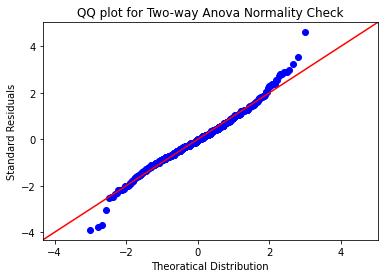

In [161]:
#Normality test for 2-way ANOVA
sm.qqplot(res3.anova_std_residuals, line = '45')
plt.xlabel('Theoratical Distribution')
plt.ylabel('Standard Residuals')
plt.title('QQ plot for Two-way Anova Normality Check')
plt.show()

In [162]:
#constancy of variance for 2-way ANOVA -> levene's test (popular one, also have other tests)
res= stat()
res.levene(df= df4, res_var = 'BloodPressure', xfac_var= ['WeightCategory', 'Outcome'])
res.levene_summary

#p>0/05 fail to reject H0 --> with consistent variance

Parameter   Value
0      Test statistics (W)  1.3870
1  Degrees of freedom (Df)  5.0000
2                  p value  0.2269

In [392]:
### multi linear regression 
#make a new copy of BMI, BP, & Outcome
 
df5 = df2[['Outcome', 'BloodPressure', 'BMI']].copy()

X= df5[['Outcome', 'BMI']]
y= df5['BloodPressure']



In [416]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [417]:
lr_coef = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
lr_coef

Coefficient
Outcome     2.341455
BMI         0.451857

In [419]:
lr_X = sm.add_constant(X)
lr_est = sm.OLS(y, lr_X)
lr_est2 = lr_est.fit()
print(lr_est2.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     37.57
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.73e-16
Time:                        18:02:17   Log-Likelihood:                -2968.3
No. Observations:                 768   AIC:                             5943.
Df Residuals:                     765   BIC:                             5957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9060      2.040     27.900      0.0

In [ ]:
### Prediction model by linear regression ###

In [393]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [394]:

linearmodel = LinearRegression()
linearmodel.fit(train_X,train_y)

LinearRegression()

In [395]:
coeff_regression = pd.DataFrame(linearmodel.coef_, train_X.columns, columns = ['Coefficient'])
coeff_regression

Coefficient
Outcome     1.729151
BMI         0.458530

In [396]:
print(linearmodel.score(train_X, train_y))

0.08777605313126491


In [397]:
train_X2 = sm.add_constant(train_X)
est = sm.OLS(train_y, train_X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     29.40
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           6.47e-13
Time:                        17:26:03   Log-Likelihood:                -2369.3
No. Observations:                 614   AIC:                             4745.
Df Residuals:                     611   BIC:                             4758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0442      2.241     25.450      0.0

In [398]:
pred_y = linearmodel.predict(test_X)

In [399]:
pred_result = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})
pred_result.head()

Actual  Predicted
661      76  78.444277
122      74  72.450798
113      62  72.634210
14       72  70.603416
529      65  68.324029

In [412]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

 

MAE: 8.970606981403568
MSE: 140.2447375770294
RMSE: 11.842497100570867


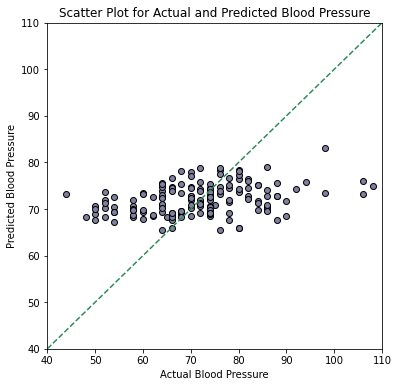

In [451]:
import matplotlib.lines as lines
plt.figure(figsize=(6, 6))
plt.scatter(pred_result['Actual'], pred_result['Predicted'], c= '#7f7f9f', edgecolor= 'k')

 
#fig.add_artist(lines.Line2D([0, 1], [0, 1]))
plt.plot([40, 110], [40, 110], 'k-', color = 'seagreen', linestyle='dashed')
plt.xlim(40, 110)
plt.ylim(40, 110)
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.title('Scatter Plot for Actual and Predicted Blood Pressure')
plt.show()

In [ ]:
### further exploration for discussion part ###

In [346]:
### multi linear regression with more independent variables 
#make a new copy of BMI, BP, & Outcome
 
df6 = df2[['Outcome', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']].copy()

X3= df6[['Outcome', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
y3= df6['BloodPressure']

In [347]:
linear_reg= LinearRegression().fit(X3, y3)

In [348]:
coeff_regression2 = pd.DataFrame(linear_reg.coef_, X3.columns, columns = ['Coefficient'])
coeff_regression2

Coefficient
Outcome                      0.511257
BMI                          0.492101
Age                          0.323875
DiabetesPedigreeFunction    -2.123750

In [349]:
X4 = sm.add_constant(X3)
est3 = sm.OLS(y3, X4)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     43.56
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           5.97e-33
Time:                        16:26:45   Log-Likelihood:                -2925.3
No. Observations:                 768   AIC:                             5861.
Df Residuals:                     763   BIC:                             5884.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   